# Imports and plotting format

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

from functions import utils, get_features

from functions.plotting import plot_conformers

import warnings
warnings.filterwarnings("ignore")

/var/folders/q_/pxh8rpm1021bvcmqb5qg17p00000gn/T/ipykernel_82101/3789427626.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
paramsscreen = {'backend': 'ps',
            'axes.labelsize': 15,
           'legend.fontsize': 15,
           'xtick.labelsize': 13,
           'ytick.labelsize': 13,
           'axes.titlesize': 16}

plt.rcParams.update(paramsscreen)

# Define paths and ligand IDs

In [3]:
full_5kcal = Path("./calculation_files/crest/5kcal_full")
clustered_5kcal = Path("./calculation_files/crest/5kcal_clustered")
full_10kcal = Path("./calculation_files/crest/10kcal_full")
clustered_10kcal = Path("./calculation_files/crest/10kcal_clustered")

features_path = Path("./feature_files")

In [4]:
ligands = ["pp000067", "pp000085", "pp000091", "pp000110", "pp000133", "pp000135",
           "pp000298", "pp000321", "pp000390", "pp000425", "pp000458", "pp000670"]

# Plot bar graphs of ensemble sizes

## Get lists of numbers of conformers by ligand id

In [5]:
# 5 kcal/mol full ensemble
full_5kcal_no_conformers = []
for ligand in ligands:
    no_conformers = utils.count_conformer_number(full_5kcal, ligand)
    full_5kcal_no_conformers.append(no_conformers)

# 5 kcal/mol clustered ensemble
clustered_5kcal_no_conformers = []
for ligand in ligands:
    no_conformers = utils.count_conformer_number(clustered_5kcal, ligand)
    clustered_5kcal_no_conformers.append(no_conformers)

# 10 kcal/mol full ensemble
full_10kcal_no_conformers = []
for ligand in ligands:
    no_conformers = utils.count_conformer_number(full_10kcal, ligand)
    full_10kcal_no_conformers.append(no_conformers)

# 10 kcal/mol clustered ensemble
clustered_10kcal_no_conformers = []
for ligand in ligands:
    no_conformers = utils.count_conformer_number(clustered_10kcal, ligand)
    clustered_10kcal_no_conformers.append(no_conformers)

## Setup plotting dictionary

In [6]:
# comment out the following lines to exclude from plotting

plotting_dictionary = {"5kcal_full": full_5kcal_no_conformers,
                          "5kcal_clustered": clustered_5kcal_no_conformers,
                          # "10kcal_full": full_10kcal_no_conformers,
                          # "10kcal_clustered": clustered_10kcal_no_conformers,
                        }

## Plot conformer bar graph

Average number of conformers in 5 kcal/mol full ensemble:  116.16666666666667
Average number of conformers in 5 kcal/mol clustered ensemble:  12.5
Average number of conformers in 10 kcal/mol full ensemble:  351.75
Average number of conformers in 10 kcal/mol clustered ensemble:  23.5


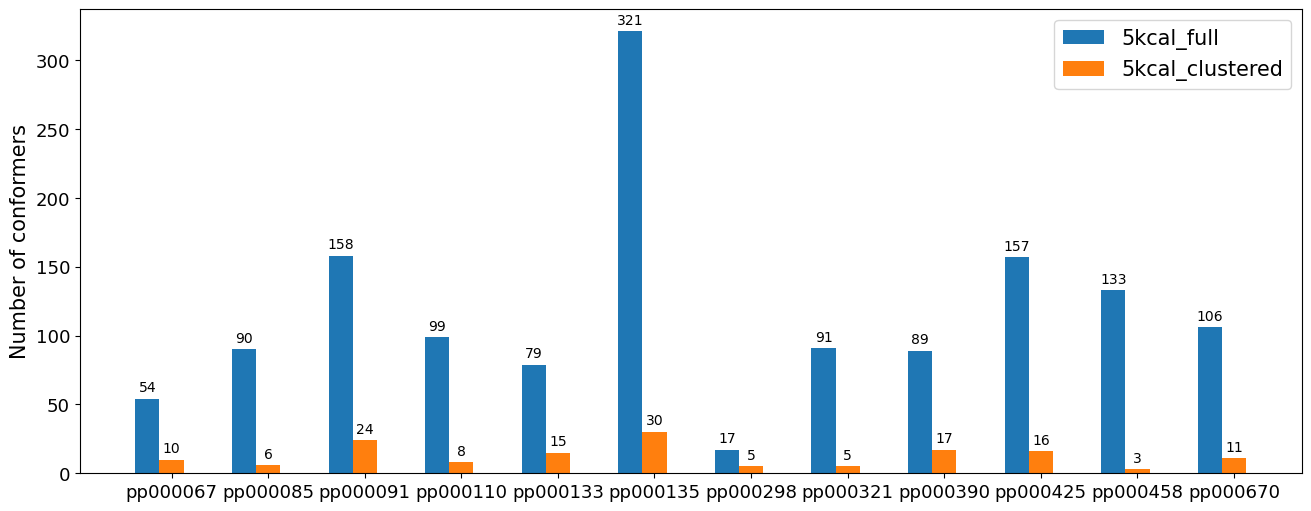

In [7]:
plot_conformers.bar_graph(ligands, plotting_dictionary)  # add save=True to save the figure

# determine the average number of conformers in each of the above lists
print("Average number of conformers in 5 kcal/mol full ensemble: ", np.average(full_5kcal_no_conformers))
print("Average number of conformers in 5 kcal/mol clustered ensemble: ", np.average(clustered_5kcal_no_conformers))
print("Average number of conformers in 10 kcal/mol full ensemble: ", np.average(full_10kcal_no_conformers))
print("Average number of conformers in 10 kcal/mol clustered ensemble: ", np.average(clustered_10kcal_no_conformers))

# Ensemble RMSD analysis

In [8]:
# define paths where files for the 1 file per ligand are stored

full_5kcal_1file = Path("./calculation_files/crest/5kcal_full_1file")
clustered_5kcal_1file = Path("./calculation_files/crest/5kcal_clustered_1file")
full_10kcal_1file = Path("./calculation_files/crest/10kcal_full_1file")
clustered_10kcal_1file = Path("./calculation_files/crest/10kcal_clustered_1file")

  8%|███▋                                        | 1/12 [00:00<00:01,  7.68it/s]

pp000067 5kcal_full_1file mean: 0.783923768771763, std: 0.3002741091017668, range: 1.3059495072744622
pp000067 10kcal_full_1file mean: 1.218506032604776, std: 0.29501274656366966, range: 1.8193245602451604
pp000085 5kcal_full_1file mean: 0.7098533380058828, std: 0.48083904930995525, range: 3.2251956195327462
pp000085 10kcal_full_1file mean: 1.2314033063521455, std: 1.0061812369863095, range: 4.19712626637841
pp000091 5kcal_full_1file mean: 2.534909784302269, std: 0.9859947407293403, range: 3.9274984709096916
pp000091 10kcal_full_1file mean: 2.1799216942007673, std: 0.49067696729107185, range: 3.7500577857409123


 42%|██████████████████▎                         | 5/12 [00:00<00:00, 11.63it/s]

pp000110 5kcal_full_1file mean: 0.8375221634499747, std: 0.4243141863249316, range: 2.4339407094264716
pp000110 10kcal_full_1file mean: 1.0494334521637183, std: 0.38031536722788045, range: 1.9487180142674267
pp000133 5kcal_full_1file mean: 0.9088674245655302, std: 0.6084337887989293, range: 2.317769311316996
pp000133 10kcal_full_1file mean: 0.981075010676603, std: 0.5701595847033446, range: 2.281333060191887


 58%|█████████████████████████▋                  | 7/12 [00:00<00:00,  7.10it/s]

pp000135 5kcal_full_1file mean: 2.9358370866119308, std: 0.9077127656541443, range: 5.026319396684309
pp000135 10kcal_full_1file mean: 3.3220471695738136, std: 0.9693714068979118, range: 5.032250118912165
pp000298 5kcal_full_1file mean: 0.817397833606245, std: 0.4231867099291096, range: 1.4609853566515634
pp000298 10kcal_full_1file mean: 0.7297032458812593, std: 0.3589697797561403, range: 1.3646401465902327
pp000321 5kcal_full_1file mean: 1.3515811619158635, std: 0.6498613913611185, range: 2.156553873218085
pp000321 10kcal_full_1file mean: 1.8514393887798513, std: 0.4842699309663475, range: 2.554453654926193
pp000390 5kcal_full_1file mean: 1.4300666495097911, std: 0.4347826187822215, range: 2.2360047129405465
pp000390 10kcal_full_1file mean: 2.42083780645336, std: 0.4474731864327697, range: 2.936470643988549


100%|███████████████████████████████████████████| 12/12 [00:01<00:00,  8.79it/s]

pp000425 5kcal_full_1file mean: 1.2393493115587289, std: 0.7052654657978985, range: 3.9821615057047897
pp000425 10kcal_full_1file mean: 2.045588922911899, std: 0.8024652974774089, range: 4.593777463144664
pp000458 5kcal_full_1file mean: 1.0392510687122, std: 0.4511395366458815, range: 2.7008730055632246
pp000458 10kcal_full_1file mean: 1.6009339334130466, std: 0.6377850561801834, range: 2.779045277102421
pp000670 5kcal_full_1file mean: 1.3794639471513257, std: 0.5166310935195728, range: 3.1132242809126716
pp000670 10kcal_full_1file mean: 1.0289880118165378, std: 0.622247298983176, range: 3.211336155536774


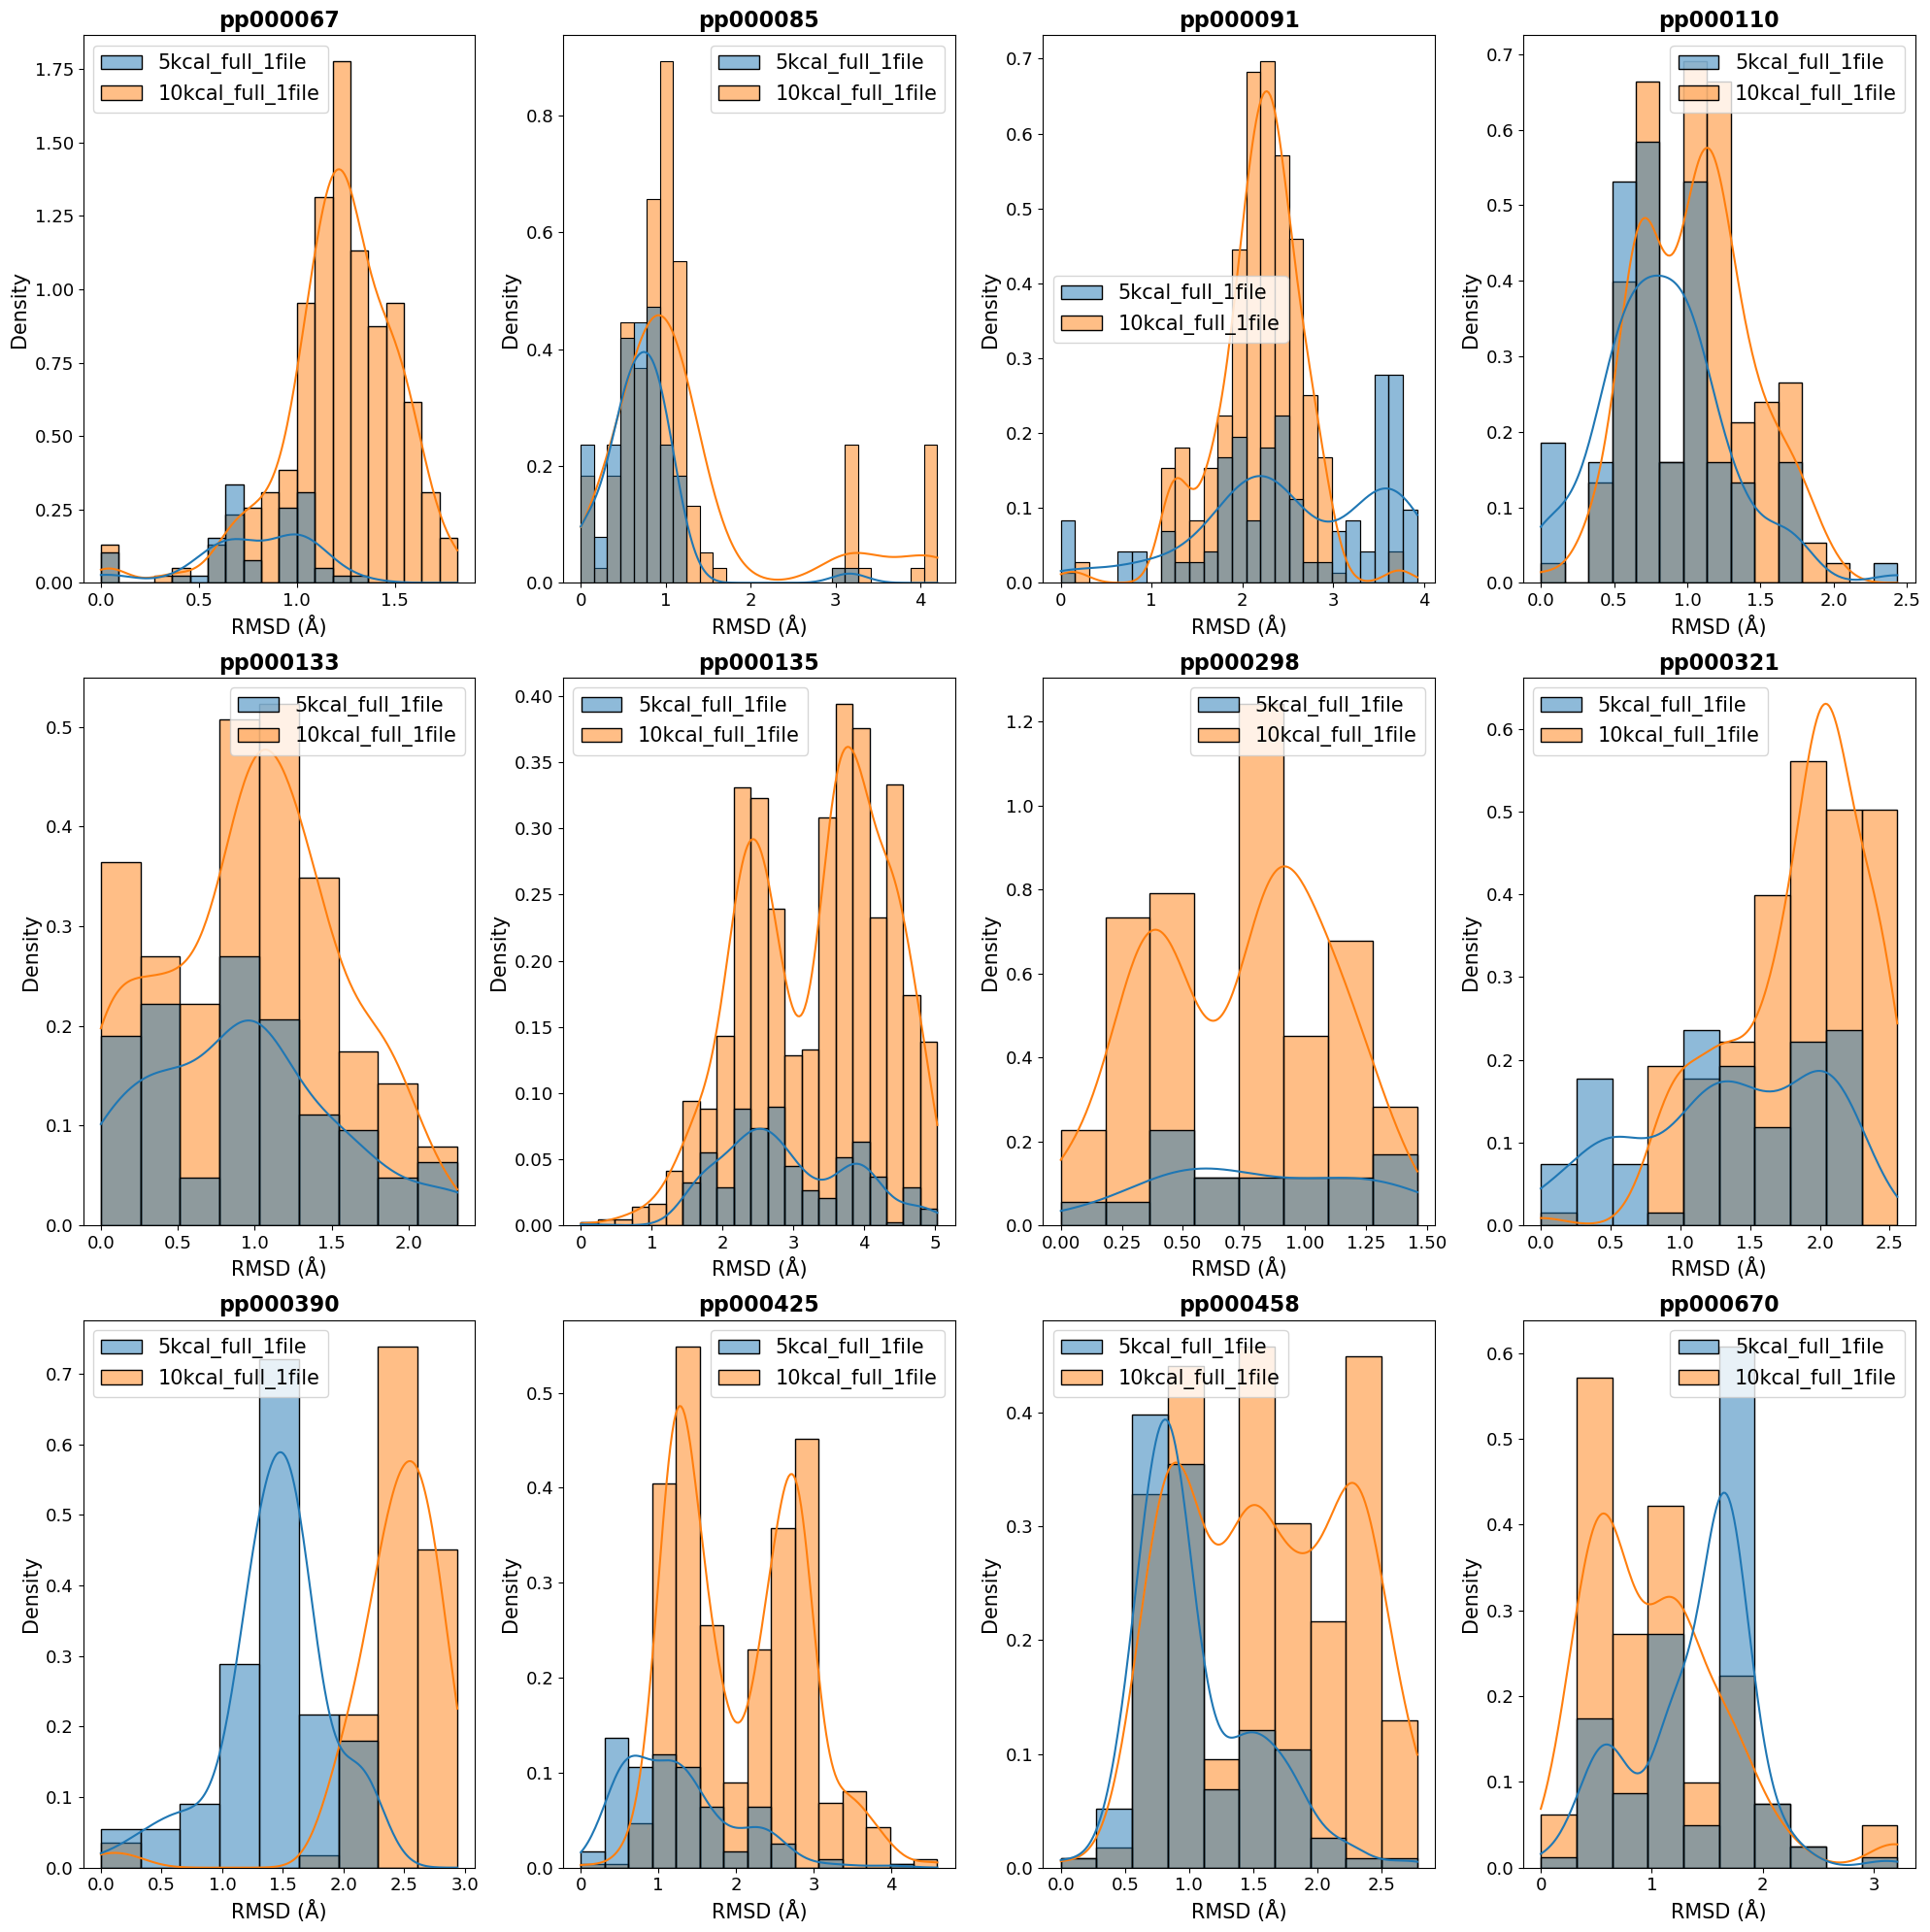

In [9]:
# change set 1 and set 2 to the desired paths to compare different ensembles
# set save=True to save the figure

plot_conformers.rmsd_analysis(ligands, set1=full_5kcal_1file, set2=full_10kcal_1file)

# Collect ensemble features

In [10]:
# get features for the 5 kcal/mol full ensemble

ensemble = full_5kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = get_features.get_bite_angle(file)
    buried_volume = get_features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = get_features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

  0%|          | 0/1394 [00:00<?, ?it/s]

,file,bite_angle,buried_volume,solid_angle,equivalent_cone_angle,G_param
0,pp000133-Pd_60,88.485498,59.609113,7.230213,197.337792,57.536209
1,pp000390-Pd_11,110.830230,60.592154,7.721228,206.461290,61.443578
2,pp000133-Pd_74,87.760359,59.224748,7.194212,196.673913,57.249721
3,pp000135-Pd_156,86.743288,54.654887,7.299215,198.611887,58.085310
4,pp000135-Pd_142,86.726350,54.202968,7.295215,198.537965,58.053478
...,...,...,...,...,...,...
1389,pp000390-Pd_34,108.513032,62.097582,7.700227,206.067999,61.276460
1390,pp000133-Pd_45,88.695446,59.321422,7.213213,197.024222,57.400923
1391,pp000135-Pd_167,86.338051,54.529678,7.262214,197.928398,57.790864
1392,pp000135-Pd_173,86.201272,57.932468,7.687227,205.824690,61.173007


In [12]:
# get features for the 5 kcal/mol clustered ensemble

ensemble = clustered_5kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = get_features.get_bite_angle(file)
    buried_volume = get_features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = get_features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

  0%|          | 0/150 [00:00<?, ?it/s]

,file,bite_angle,buried_volume,solid_angle,equivalent_cone_angle,G_param
0,pp000390-Pd_11,108.607502,62.113306,7.709227,206.236513,61.348082
1,pp000091-Pd_5,91.720355,58.663926,6.960205,192.371382,55.387554
2,pp000670-Pd_5,99.813451,58.807189,7.225213,197.245552,57.496419
3,pp000067-Pd_8,86.627529,61.351565,7.480221,201.965574,59.525704
4,pp000091-Pd_15,90.666738,57.772899,6.892203,191.124622,54.846411
...,...,...,...,...,...,...
145,pp000091-Pd_18,91.397458,59.207860,7.045208,193.931920,56.063982
146,pp000670-Pd_8,100.999217,58.882897,7.217213,197.097991,57.432755
147,pp000067-Pd_5,87.510838,63.643776,7.696227,205.993122,61.244628
148,pp000390-Pd_6,109.540546,60.359206,7.617225,204.516567,60.615948


In [13]:
# get features for the 10 kcal/mol full ensemble

ensemble = full_10kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = get_features.get_bite_angle(file)
    buried_volume = get_features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = get_features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

  0%|          | 0/4221 [00:00<?, ?it/s]

,file,bite_angle,buried_volume,solid_angle,equivalent_cone_angle,G_param
0,pp000067-Pd_254,86.751323,59.278909,7.217213,197.097991,57.432755
1,pp000133-Pd_60,89.738300,58.889303,7.167211,196.176375,57.034856
2,pp000390-Pd_11,101.025381,66.284826,8.355246,218.510696,66.488938
3,pp000091-Pd_202,93.634975,58.430395,6.982206,192.775053,55.562629
4,pp000091-Pd_216,94.394425,58.645290,7.012207,193.325772,55.801369
...,...,...,...,...,...,...
4216,pp000135-Pd_1563,86.166994,55.724119,7.493221,202.207146,59.629158
4217,pp000135-Pd_173,86.675173,55.601822,7.261214,197.909935,57.782906
4218,pp000133-Pd_79,87.237115,58.727986,7.146211,195.789614,56.867738
4219,pp000135-Pd_1205,86.222488,55.675200,7.468220,201.742673,59.430208


In [14]:
# get features for the 10 kcal/mol clustered ensemble

ensemble = clustered_10kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = get_features.get_bite_angle(file)
    buried_volume = get_features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = get_features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

  0%|          | 0/282 [00:00<?, ?it/s]

,file,bite_angle,buried_volume,solid_angle,equivalent_cone_angle,G_param
0,pp000390-Pd_11,103.957939,61.677111,7.658226,205.282348,60.942225
1,pp000091-Pd_5,90.790326,58.572493,6.985206,192.830112,55.586503
2,pp000135-Pd_98,86.444228,53.895476,7.422219,200.888979,59.064141
3,pp000670-Pd_5,101.030271,58.157263,7.148211,195.826440,56.883654
4,pp000067-Pd_8,86.840280,59.895639,7.363217,199.795732,58.594620
...,...,...,...,...,...,...
277,pp000135-Pd_95,86.211022,54.008456,7.264214,197.965327,57.806780
278,pp000135-Pd_81,87.102592,56.213311,7.481221,201.984153,59.533662
279,pp000390-Pd_6,101.025381,66.284826,8.355246,218.510696,66.488938
280,pp000091-Pd_8,92.128565,58.411177,6.931204,191.839504,55.156772


# Analyze ensemble features

In [15]:
# import csv files with features

full_5kcal_features = pd.read_csv(features_path / "5kcal_full_ensemble_features.csv")
clustered_5kcal_features = pd.read_csv(features_path / "5kcal_clustered_ensemble_features.csv")
full_10kcal_features = pd.read_csv(features_path / "10kcal_full_ensemble_features.csv")
clustered_10kcal_features = pd.read_csv(features_path / "10kcal_clustered_ensemble_features.csv")

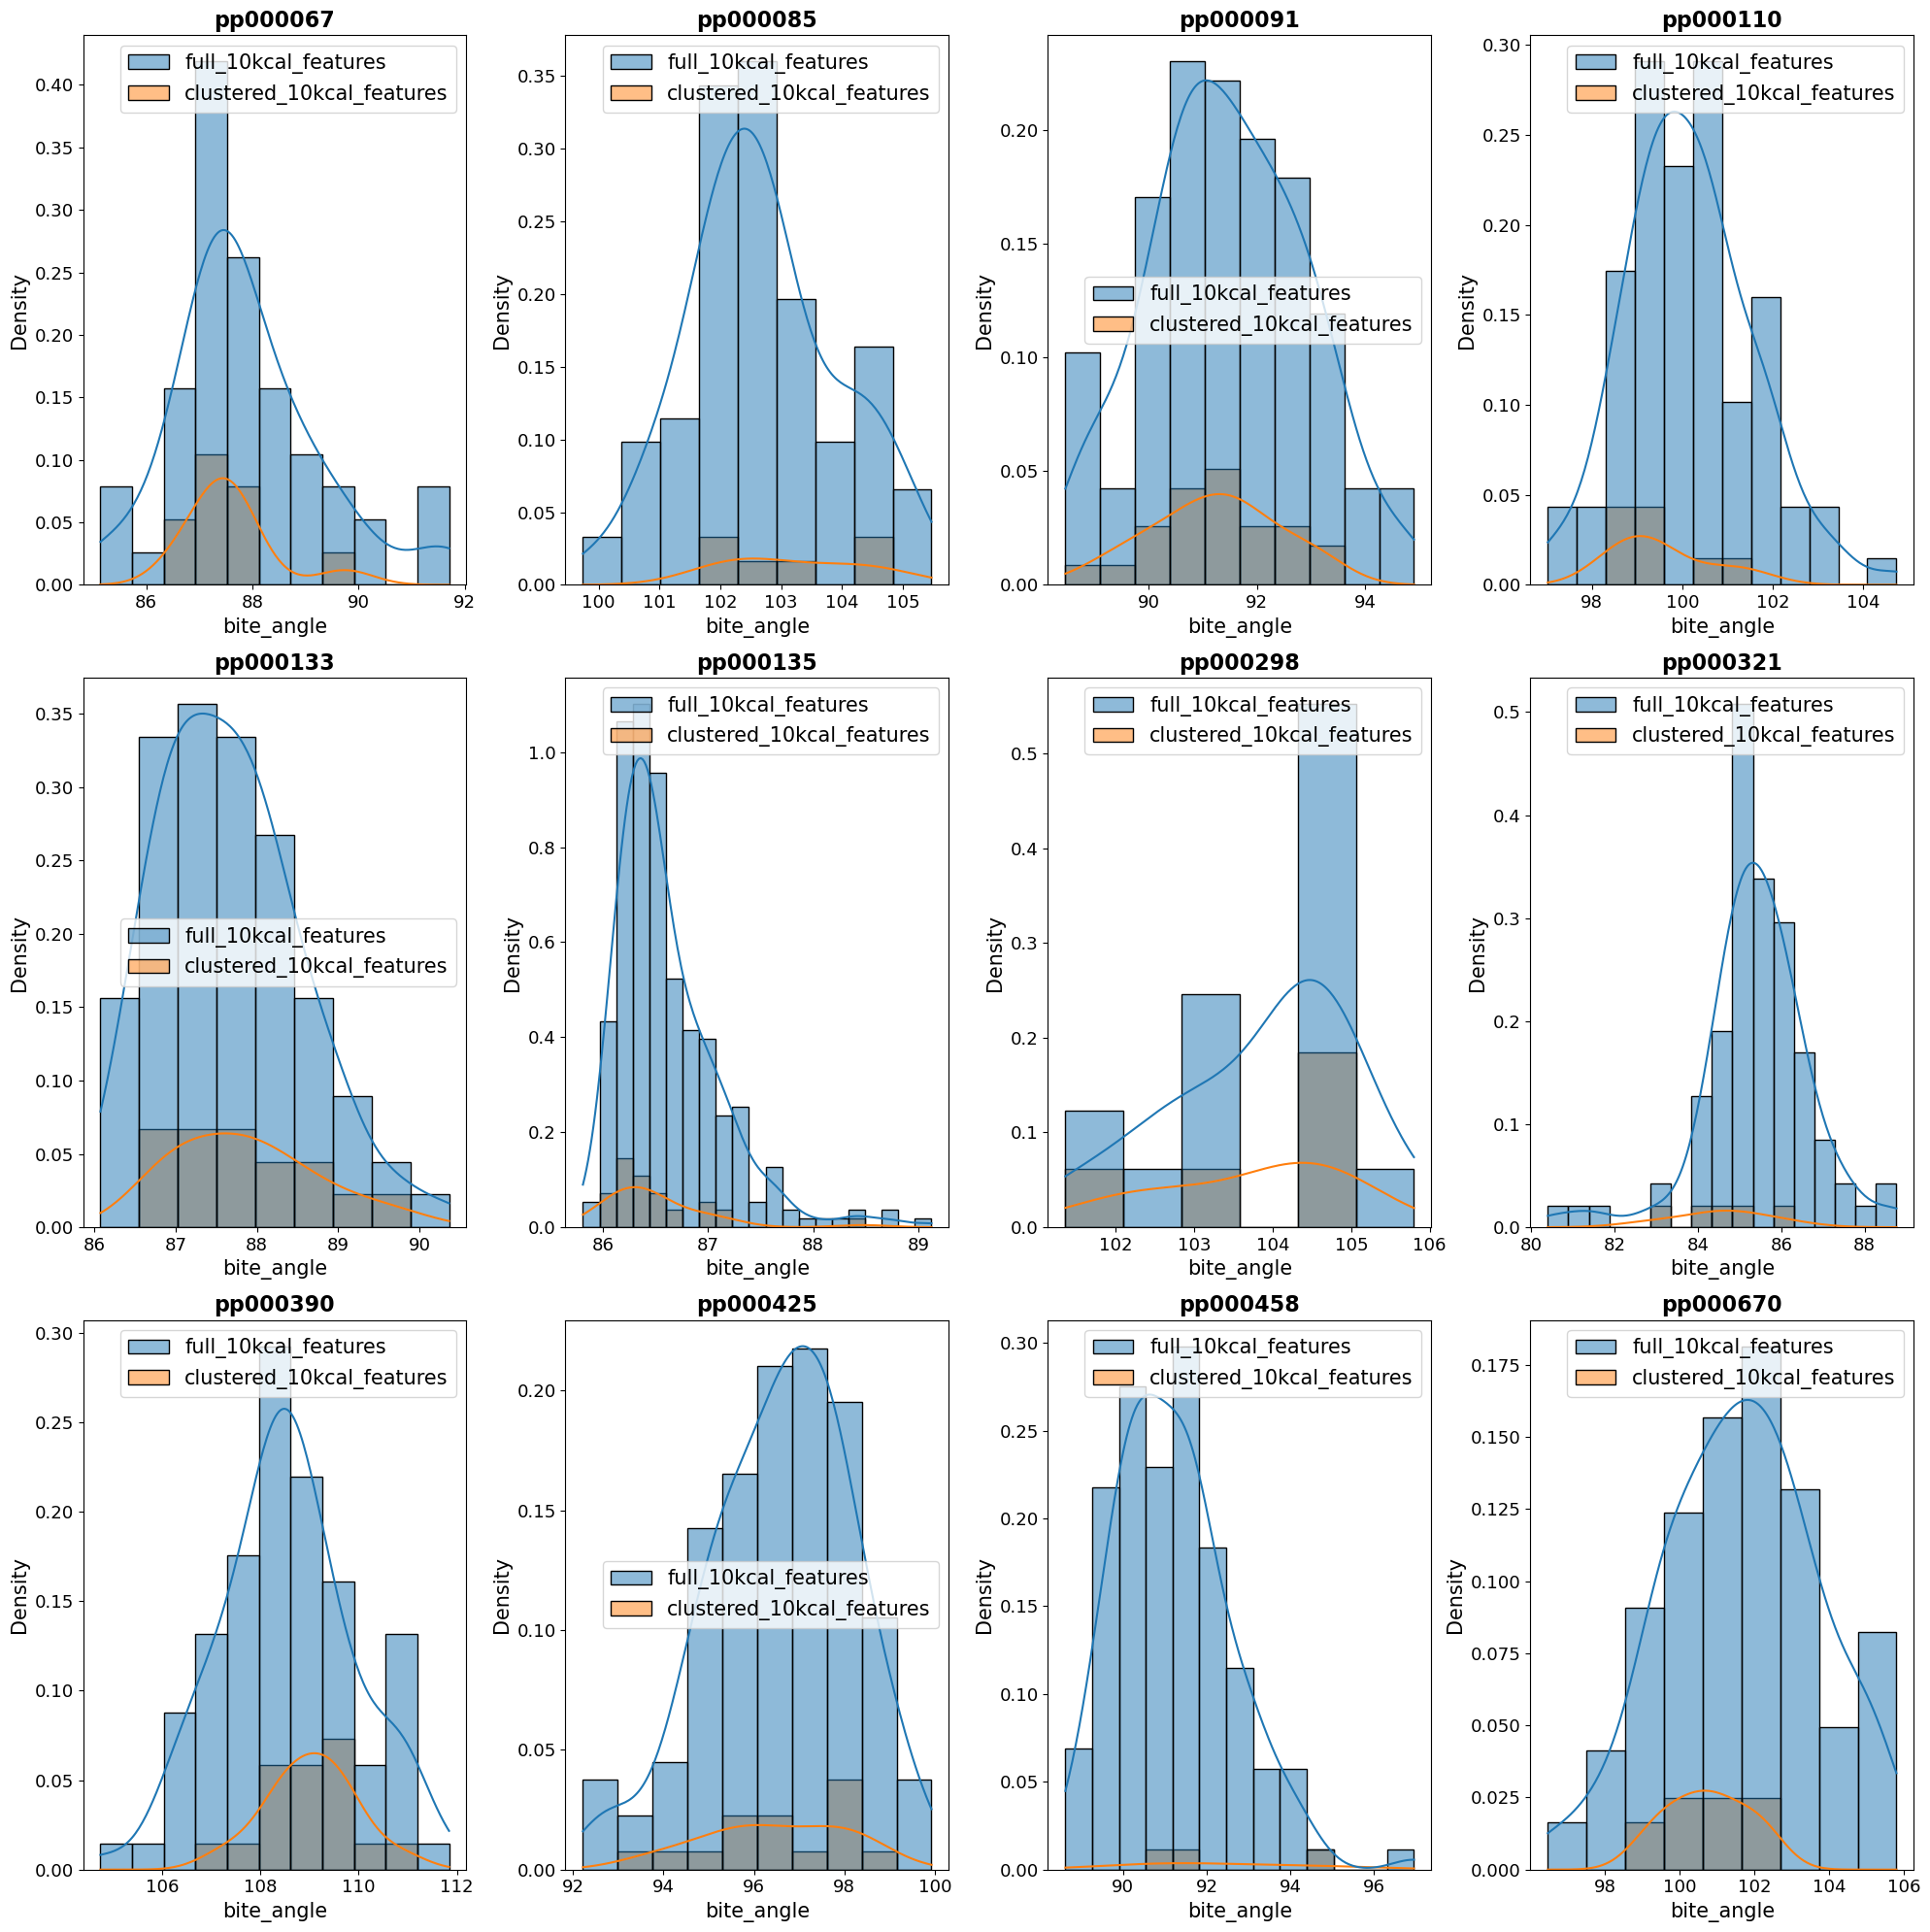

In [16]:
plot_conformers.feature_histograms(ligands, feature = 'bite_angle',  # change feature to plot different features
                                   data1 = full_5kcal_features,  # specify first feature set
                                   data2 = clustered_5kcal_features,  # specify second feature set
                                   label1 = "full_10kcal_features",  # specify label for first feature set
                                   label2 = "clustered_10kcal_features")  # specify label for second feature set